In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [2]:
#create dataframes
dpw_df = pd.read_csv("2425data/NO2_DPW_2425.csv")
pema_df = pd.read_csv("2425data/NO2_PEMA_2425.csv")
pha_df = pd.read_csv("2425data/NO2_PHA_2425.csv")


In [3]:
#remove unnecessary columns
dpw_columns_to_remove = ["id", "sn", "pm1", "pm25", "pm10", "co", "no", "pm1_model_id", "pm25_model_id", "pm10_model_id", "co_model_id", "no_model_id", "no2_model_id", "o3_model_id"]
dpw_df = dpw_df.drop(columns=dpw_columns_to_remove)
dpw_df.head()


,timestamp,timestamp_local,rh,temp,lat,lon,device_state,no2,o3
0,2025-04-30T23:59:53Z,2025-04-30T19:59:53Z,19.2,21.4,41.79521,-71.39783,ACTIVE,7.695,54.545
1,2025-04-30T23:58:53Z,2025-04-30T19:58:53Z,19.4,21.5,41.79521,-71.39783,ACTIVE,7.744,53.284
2,2025-04-30T23:57:53Z,2025-04-30T19:57:53Z,18.7,21.5,41.79521,-71.39783,ACTIVE,8.391,51.882
3,2025-04-30T23:56:53Z,2025-04-30T19:56:53Z,17.7,21.6,41.79521,-71.39783,ACTIVE,7.459,53.250
4,2025-04-30T23:55:53Z,2025-04-30T19:55:53Z,17.3,21.6,41.79521,-71.39783,ACTIVE,7.971,53.545


In [4]:
pema_columns_to_remove = ["id", "sn", "pm1", "pm25", "pm10", "co", "no", "pm1_model_id", "pm25_model_id", "pm10_model_id", "co_model_id", "no_model_id", "no2_model_id", "o3_model_id", "wd", "ws", "ws_scalar"]
pema_df = pema_df.drop(columns=pema_columns_to_remove)
pema_df.head()

,timestamp,timestamp_local,rh,temp,lat,lon,device_state,no2,o3
0,2025-04-30T23:59:17Z,2025-04-30T19:59:17Z,20.1,20.7,41.8522,-71.4198,ACTIVE,8.464,53.604
1,2025-04-30T23:58:17Z,2025-04-30T19:58:17Z,19.8,20.8,41.8522,-71.4198,ACTIVE,8.370,52.890
2,2025-04-30T23:57:17Z,2025-04-30T19:57:17Z,20.1,20.9,41.8522,-71.4198,ACTIVE,8.484,52.609
3,2025-04-30T23:56:17Z,2025-04-30T19:56:17Z,20.1,20.9,41.8522,-71.4198,ACTIVE,8.438,52.861
4,2025-04-30T23:55:17Z,2025-04-30T19:55:17Z,20.3,21.0,41.8522,-71.4198,ACTIVE,8.555,51.585


In [5]:
pha_columns_to_remove = ["id", "sn", "pm1", "pm25", "pm10", "co", "no", "pm1_model_id", "pm25_model_id", "pm10_model_id", "co_model_id", "no_model_id", "no2_model_id", "o3_model_id", "wd", "ws", "ws_scalar"]
pha_df = pha_df.drop(columns=pha_columns_to_remove)
pha_df.head()

,timestamp,timestamp_local,rh,temp,lat,lon,device_state,no2,o3
0,2025-04-30T23:59:47Z,2025-04-30T19:59:47Z,19.8,19.4,41.8171,-71.4553,ACTIVE,8.865,53.458
1,2025-04-30T23:58:47Z,2025-04-30T19:58:47Z,19.9,19.5,41.8171,-71.4553,ACTIVE,9.356,51.927
2,2025-04-30T23:57:47Z,2025-04-30T19:57:47Z,19.8,19.5,41.8171,-71.4553,ACTIVE,9.334,52.956
3,2025-04-30T23:56:47Z,2025-04-30T19:56:47Z,19.6,19.6,41.8171,-71.4553,ACTIVE,8.711,51.969
4,2025-04-30T23:55:47Z,2025-04-30T19:55:47Z,19.5,19.7,41.8171,-71.4553,ACTIVE,8.604,54.015


In [6]:
print("Device state variable (DPW):")
print(dpw_df["device_state"].describe())
print(dpw_df["device_state"].value_counts())

print("")
print("no2 variable (DPW)")
print(dpw_df["no2"].describe())

print("")
print("Missing values (DPW)")
print(int(dpw_df["no2"].isnull().sum()))

Device state variable (DPW):
count     195828
unique         1
top       ACTIVE
freq      195828
Name: device_state, dtype: object
device_state
ACTIVE    195828
Name: count, dtype: int64

no2 variable (DPW)
count    195551.000000
mean         15.214292
std           6.894652
min           1.414000
25%           9.251000
50%          13.616000
75%          20.318000
max          68.616000
Name: no2, dtype: float64

Missing values (DPW)
277


In [7]:
print("Device state variable (PEMA):")
print(pema_df["device_state"].describe())
print(pema_df["device_state"].value_counts())

print("")
print("no2 variable (PEMA})")
print(pema_df["no2"].describe())

print("")
print("Missing values (PEMA)")
print(int(pema_df["no2"].isnull().sum()))

Device state variable (PEMA):
count     195835
unique         1
top       ACTIVE
freq      195835
Name: device_state, dtype: object
device_state
ACTIVE    195835
Name: count, dtype: int64

no2 variable (PEMA})
count    195835.000000
mean         17.069273
std           7.179938
min           1.362000
25%          10.611000
50%          18.485000
75%          21.876000
max          46.515000
Name: no2, dtype: float64

Missing values (PEMA)
0


In [8]:
print("Device state variable (PHA):")
print(pha_df["device_state"].describe())
print(pha_df["device_state"].value_counts())

print("")
print("no2 variable (PHA)")
print(pha_df["no2"].describe())

print("")
print("Missing values (PHA)")
print(int(pha_df["no2"].isnull().sum()))

Device state variable (PHA):
count     194547
unique         1
top       ACTIVE
freq      194547
Name: device_state, dtype: object
device_state
ACTIVE    194547
Name: count, dtype: int64

no2 variable (PHA)
count    194184.000000
mean         17.381466
std           7.486113
min           1.140000
25%          10.338000
50%          19.608000
75%          22.480000
max          46.360000
Name: no2, dtype: float64

Missing values (PHA)
363


In [9]:
#function to explore continous variables in time
def plot_box_and_histogram(column, site, site_string):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    data = site[column].dropna()

    axes[0].boxplot(data)
    boxplot_title = str(column) + " Boxplot at " + str(site_string)
    axes[0].set_title(boxplot_title)
    axes[0].set_ylabel(column)
    

    axes[1].hist(site[column], bins=60, color="skyblue", edgecolor="black")
    histogram_title = str(column) + " Histogram at " + str(site_string)
    axes[1].set_title(histogram_title)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()


count    195828.000000
mean         56.010982
std          20.723959
min          11.100000
25%          39.400000
50%          53.600000
75%          74.200000
max          94.600000
Name: rh, dtype: float64


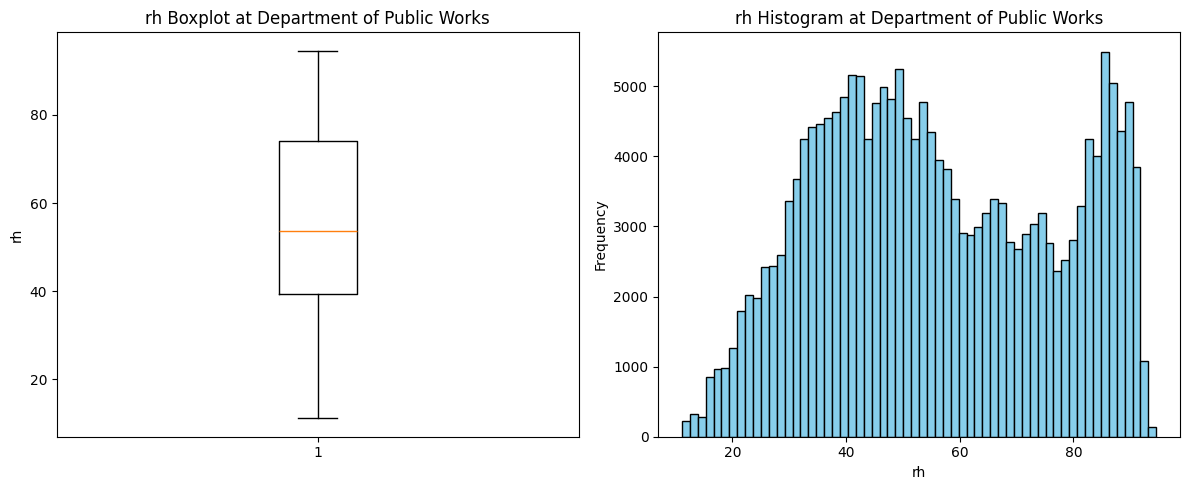

count    195828.000000
mean          5.268680
std           7.365215
min         -12.400000
25%          -0.200000
50%           4.700000
75%           9.900000
max          31.400000
Name: temp, dtype: float64


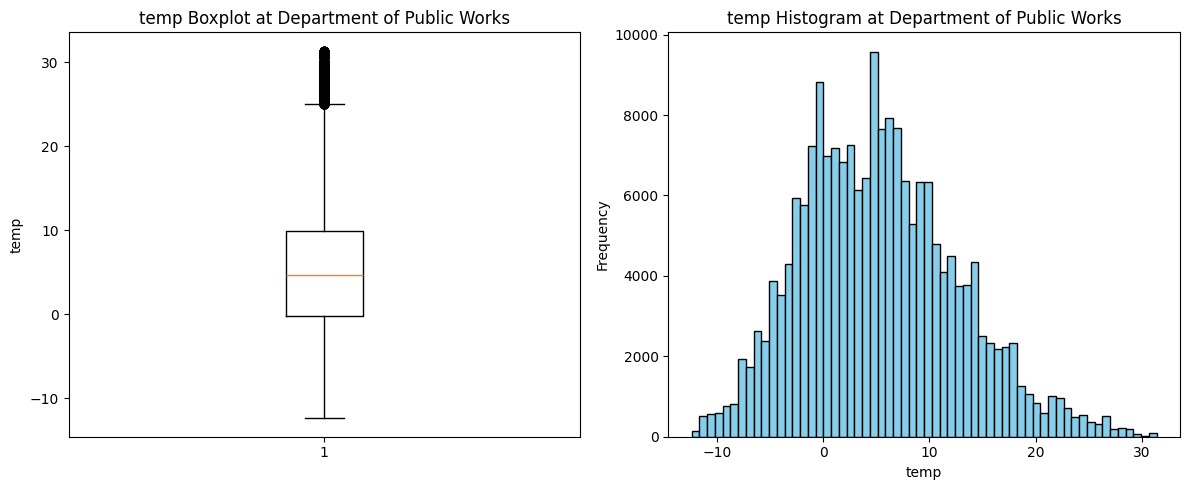

count    195551.000000
mean         15.214292
std           6.894652
min           1.414000
25%           9.251000
50%          13.616000
75%          20.318000
max          68.616000
Name: no2, dtype: float64


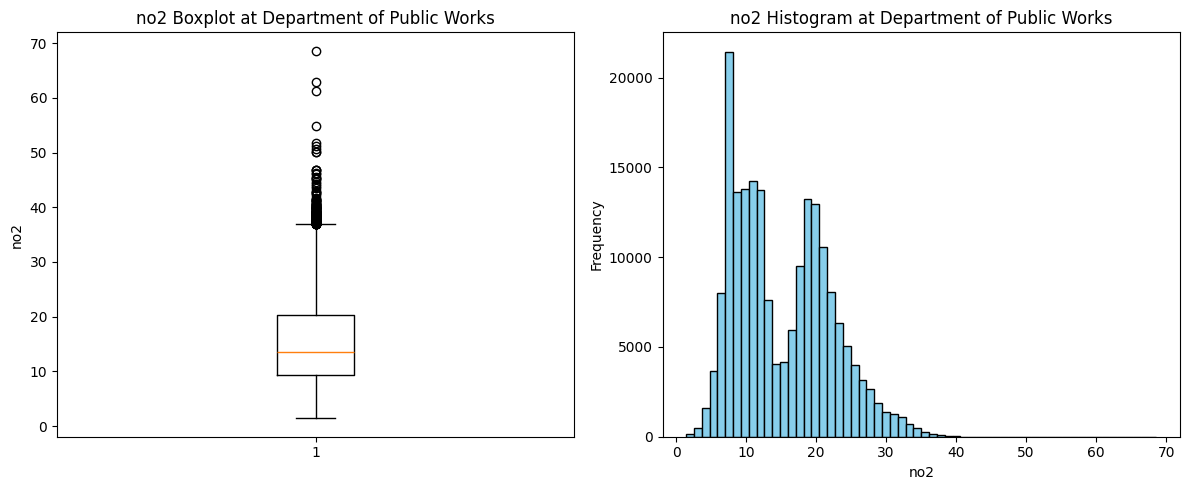

count    195550.000000
mean         41.367655
std           8.635617
min         -77.311000
25%          36.971250
50%          43.171500
75%          47.183000
max          62.427000
Name: o3, dtype: float64


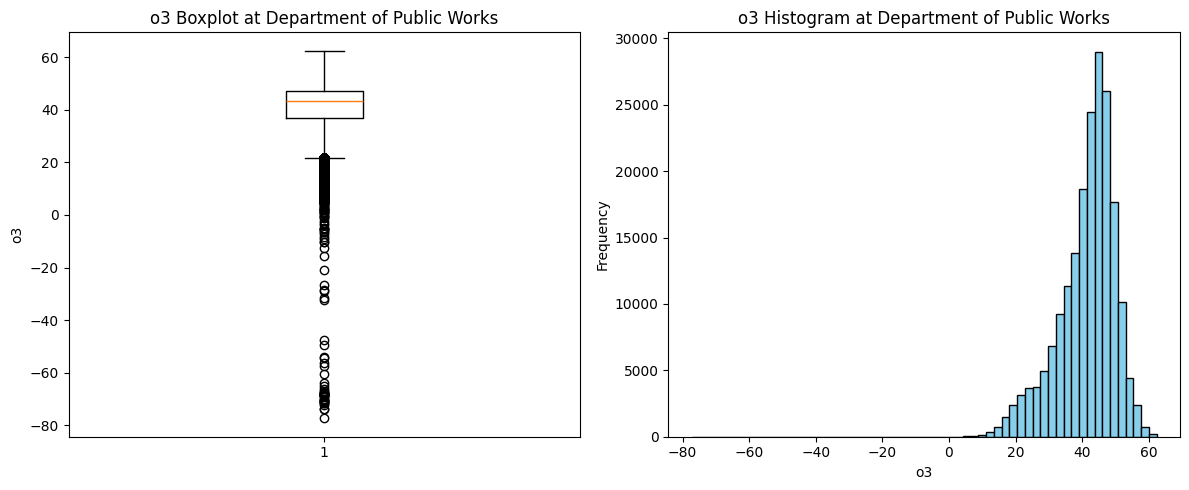

In [10]:
#DPW rh
print(dpw_df["rh"].describe())
plot_box_and_histogram("rh", dpw_df, "Department of Public Works")

#DPW temp
print(dpw_df["temp"].describe())
plot_box_and_histogram("temp", dpw_df, "Department of Public Works")

#DPW no2
print(dpw_df["no2"].describe())
plot_box_and_histogram("no2", dpw_df, "Department of Public Works")

#DPW o3
print(dpw_df["o3"].describe())
plot_box_and_histogram("o3", dpw_df, "Department of Public Works")

count    195835.000000
mean         55.169312
std          20.911354
min          10.200000
25%          38.000000
50%          53.800000
75%          73.700000
max          96.300000
Name: rh, dtype: float64


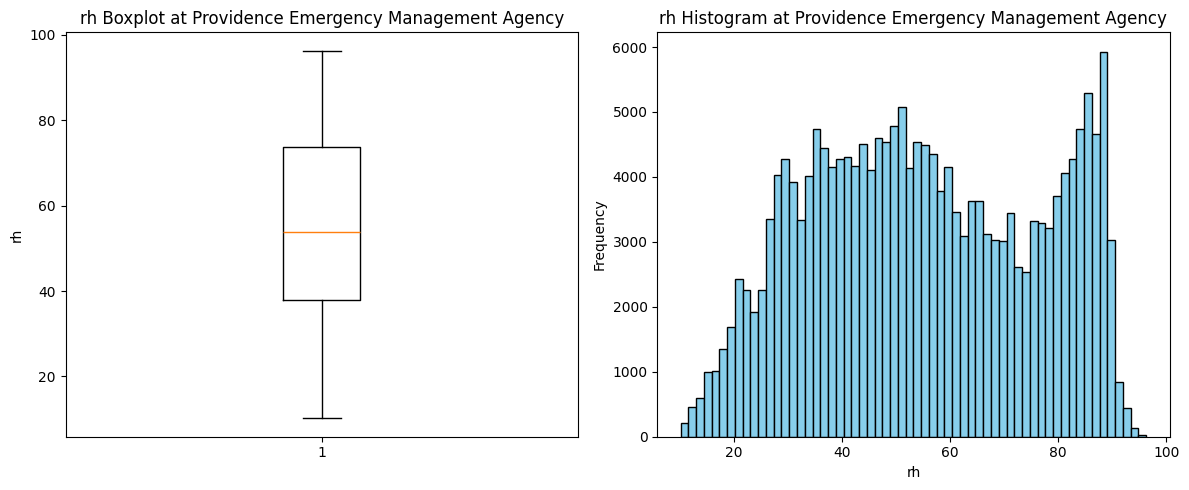

count    195835.000000
mean          5.568224
std           7.898440
min         -13.500000
25%          -0.100000
50%           5.000000
75%          10.400000
max          32.400000
Name: temp, dtype: float64


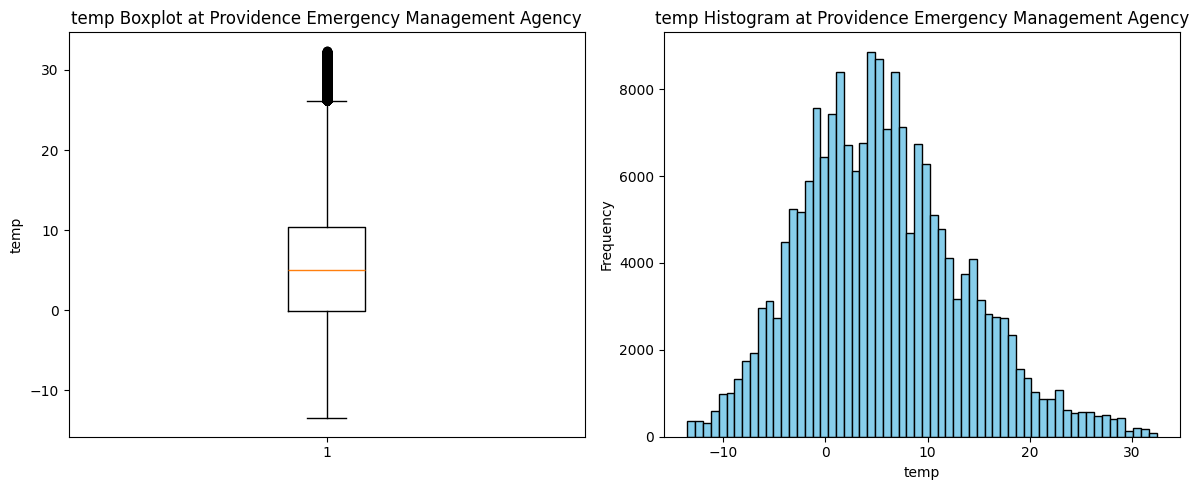

count    195835.000000
mean         17.069273
std           7.179938
min           1.362000
25%          10.611000
50%          18.485000
75%          21.876000
max          46.515000
Name: no2, dtype: float64


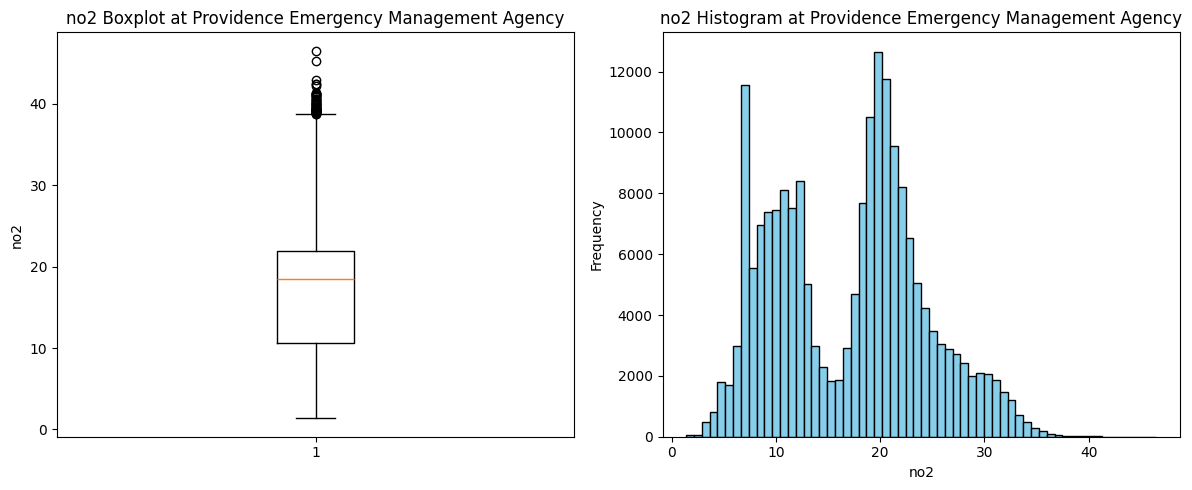

count    195835.000000
mean         40.339225
std           8.721619
min           6.428000
25%          35.854000
50%          42.188000
75%          46.316000
max          61.123000
Name: o3, dtype: float64


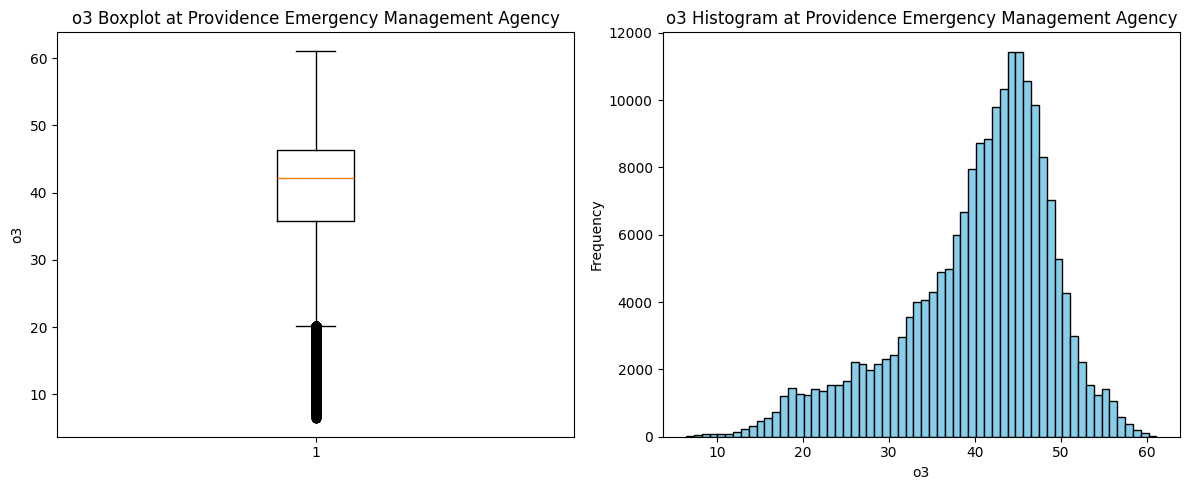

In [11]:
#PEMA rh
print(pema_df["rh"].describe())
plot_box_and_histogram("rh", pema_df, "Providence Emergency Management Agency")

#PEMA temp
print(pema_df["temp"].describe())
plot_box_and_histogram("temp", pema_df, "Providence Emergency Management Agency")

#PEMA no2
print(pema_df["no2"].describe())
plot_box_and_histogram("no2", pema_df, "Providence Emergency Management Agency")

#PEMA o3
print(pema_df["o3"].describe())
plot_box_and_histogram("o3", pema_df, "Providence Emergency Management Agency")

count    194547.000000
mean         55.577597
std          21.642090
min           9.800000
25%          37.700000
50%          54.400000
75%          74.600000
max          97.900000
Name: rh, dtype: float64


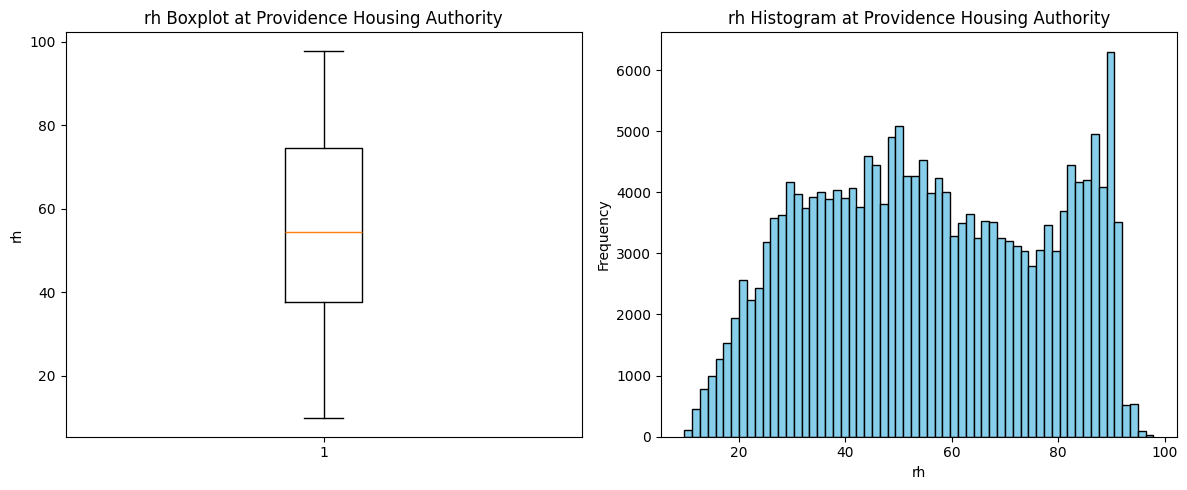

count    194547.000000
mean          5.351694
std           8.206758
min         -14.900000
25%          -0.600000
50%           4.700000
75%          10.400000
max          33.900000
Name: temp, dtype: float64


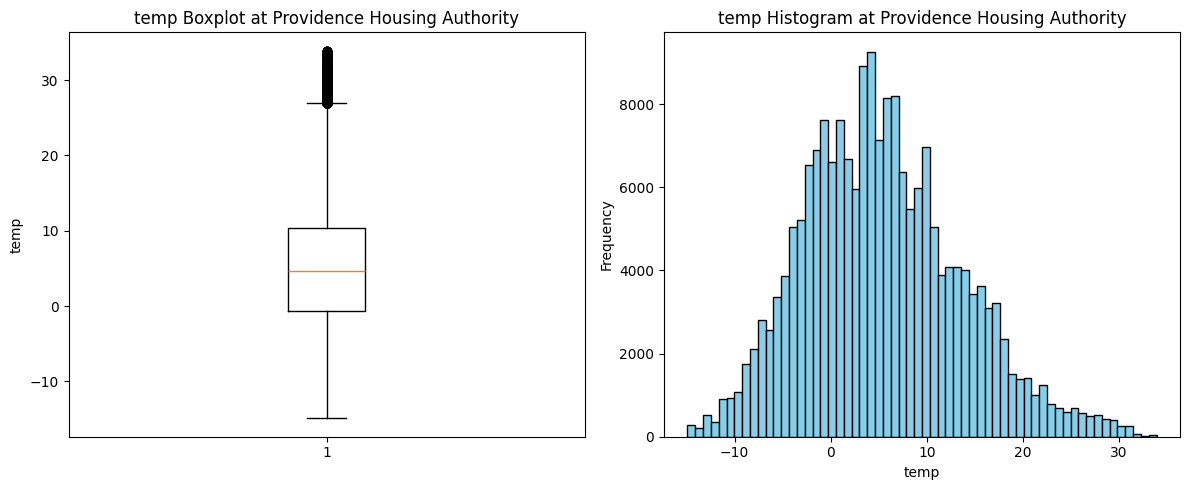

count    194184.000000
mean         17.381466
std           7.486113
min           1.140000
25%          10.338000
50%          19.608000
75%          22.480000
max          46.360000
Name: no2, dtype: float64


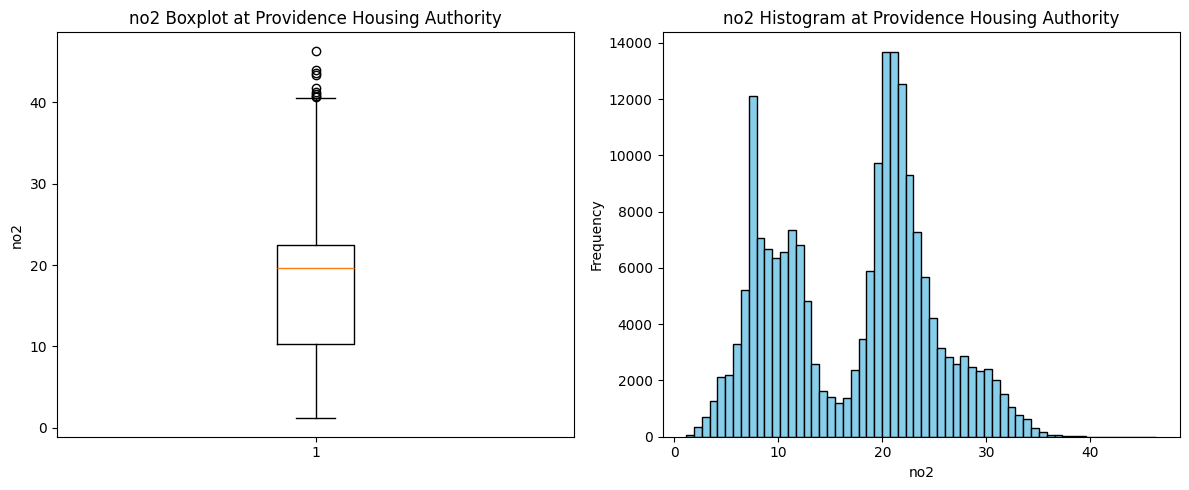

count    194184.000000
mean         39.111688
std           9.680189
min          -2.516000
25%          34.313000
50%          40.688000
75%          45.118000
max          68.927000
Name: o3, dtype: float64


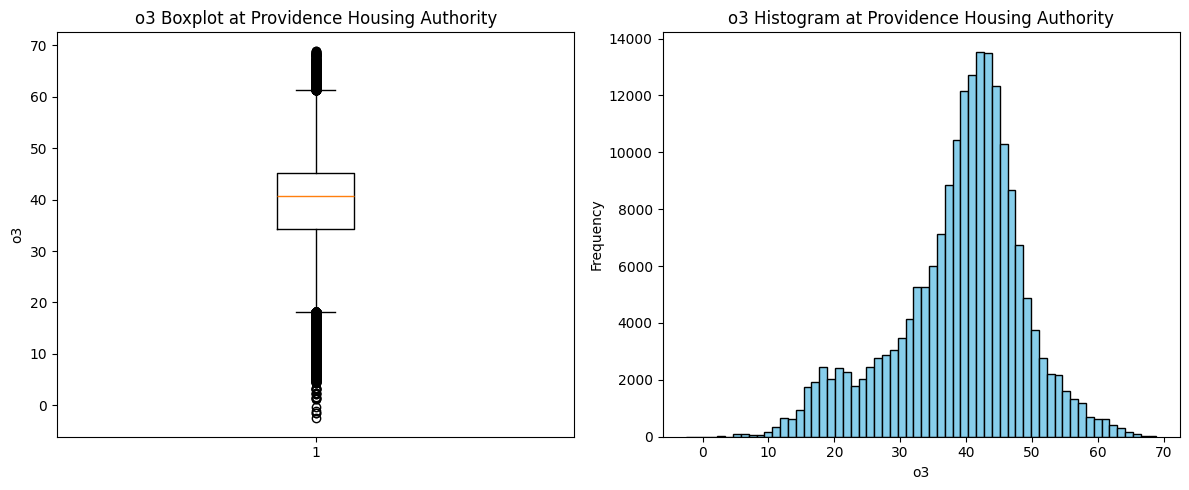

In [12]:
#PHA rh
print(pha_df["rh"].describe())
plot_box_and_histogram("rh", pha_df, "Providence Housing Authority")

#PHA temp
print(pha_df["temp"].describe())
plot_box_and_histogram("temp", pha_df, "Providence Housing Authority")

#PHA no2
print(pha_df["no2"].describe())
plot_box_and_histogram("no2", pha_df, "Providence Housing Authority")

#PHA o3
print(pha_df["o3"].describe())
plot_box_and_histogram("o3", pha_df, "Providence Housing Authority")

In [13]:
#shifting the date format to be a little more readable and useable for time series
dpw_df["timestamp"] = pd.to_datetime(dpw_df["timestamp"])
dpw_df["timestamp_local"] = pd.to_datetime(dpw_df["timestamp_local"])

dpw_df["date_utc"] = dpw_df["timestamp"].dt.strftime("%Y-%m-%d")
dpw_df["time_utc"] = dpw_df["timestamp"].dt.strftime("%H:%M:%S")

dpw_df["date_est"] = dpw_df["timestamp_local"].dt.strftime("%Y-%m-%d")
dpw_df["time_est"] = dpw_df["timestamp_local"].dt.strftime("%H:%M:%S")

#remove other timestamp columns
columns_to_remove2 = ["timestamp", "timestamp_local"]
dpw_df = dpw_df.drop(columns=columns_to_remove2)
new_order = ["date_utc", "time_utc", "date_est", "time_est", "lat", "lon", "device_state", "no2", "o3"]
dpw_df = dpw_df[new_order]

dpw_df.head()

,date_utc,time_utc,date_est,time_est,lat,lon,device_state,no2,o3
0,2025-04-30,23:59:53,2025-04-30,19:59:53,41.79521,-71.39783,ACTIVE,7.695,54.545
1,2025-04-30,23:58:53,2025-04-30,19:58:53,41.79521,-71.39783,ACTIVE,7.744,53.284
2,2025-04-30,23:57:53,2025-04-30,19:57:53,41.79521,-71.39783,ACTIVE,8.391,51.882
3,2025-04-30,23:56:53,2025-04-30,19:56:53,41.79521,-71.39783,ACTIVE,7.459,53.250
4,2025-04-30,23:55:53,2025-04-30,19:55:53,41.79521,-71.39783,ACTIVE,7.971,53.545


In [14]:
pema_df["timestamp"] = pd.to_datetime(pema_df["timestamp"])
pema_df["timestamp_local"] = pd.to_datetime(pema_df["timestamp_local"])

pema_df["date_utc"] = pema_df["timestamp"].dt.strftime("%Y-%m-%d")
pema_df["time_utc"] = pema_df["timestamp"].dt.strftime("%H:%M:%S")

pema_df["date_est"] = pema_df["timestamp_local"].dt.strftime("%Y-%m-%d")
pema_df["time_est"] = pema_df["timestamp_local"].dt.strftime("%H:%M:%S")

#remove other timestamp columns
columns_to_remove2 = ["timestamp", "timestamp_local"]
pema_df = pema_df.drop(columns=columns_to_remove2)
new_order = ["date_utc", "time_utc", "date_est", "time_est", "lat", "lon", "device_state", "no2", "o3"]
pema_df = pema_df[new_order]

pema_df.head()

,date_utc,time_utc,date_est,time_est,lat,lon,device_state,no2,o3
0,2025-04-30,23:59:17,2025-04-30,19:59:17,41.8522,-71.4198,ACTIVE,8.464,53.604
1,2025-04-30,23:58:17,2025-04-30,19:58:17,41.8522,-71.4198,ACTIVE,8.370,52.890
2,2025-04-30,23:57:17,2025-04-30,19:57:17,41.8522,-71.4198,ACTIVE,8.484,52.609
3,2025-04-30,23:56:17,2025-04-30,19:56:17,41.8522,-71.4198,ACTIVE,8.438,52.861
4,2025-04-30,23:55:17,2025-04-30,19:55:17,41.8522,-71.4198,ACTIVE,8.555,51.585


In [15]:
pha_df["timestamp"] = pd.to_datetime(pha_df["timestamp"])
pha_df["timestamp_local"] = pd.to_datetime(pha_df["timestamp_local"])

pha_df["date_utc"] = pha_df["timestamp"].dt.strftime("%Y-%m-%d")
pha_df["time_utc"] = pha_df["timestamp"].dt.strftime("%H:%M:%S")

pha_df["date_est"] = pha_df["timestamp_local"].dt.strftime("%Y-%m-%d")
pha_df["time_est"] = pha_df["timestamp_local"].dt.strftime("%H:%M:%S")

#remove other timestamp columns
columns_to_remove2 = ["timestamp", "timestamp_local"]
pha_df = pha_df.drop(columns=columns_to_remove2)
new_order = ["date_utc", "time_utc", "date_est", "time_est", "lat", "lon", "device_state", "no2", "o3"]
pha_df = pha_df[new_order]

pha_df.head()

,date_utc,time_utc,date_est,time_est,lat,lon,device_state,no2,o3
0,2025-04-30,23:59:47,2025-04-30,19:59:47,41.8171,-71.4553,ACTIVE,8.865,53.458
1,2025-04-30,23:58:47,2025-04-30,19:58:47,41.8171,-71.4553,ACTIVE,9.356,51.927
2,2025-04-30,23:57:47,2025-04-30,19:57:47,41.8171,-71.4553,ACTIVE,9.334,52.956
3,2025-04-30,23:56:47,2025-04-30,19:56:47,41.8171,-71.4553,ACTIVE,8.711,51.969
4,2025-04-30,23:55:47,2025-04-30,19:55:47,41.8171,-71.4553,ACTIVE,8.604,54.015


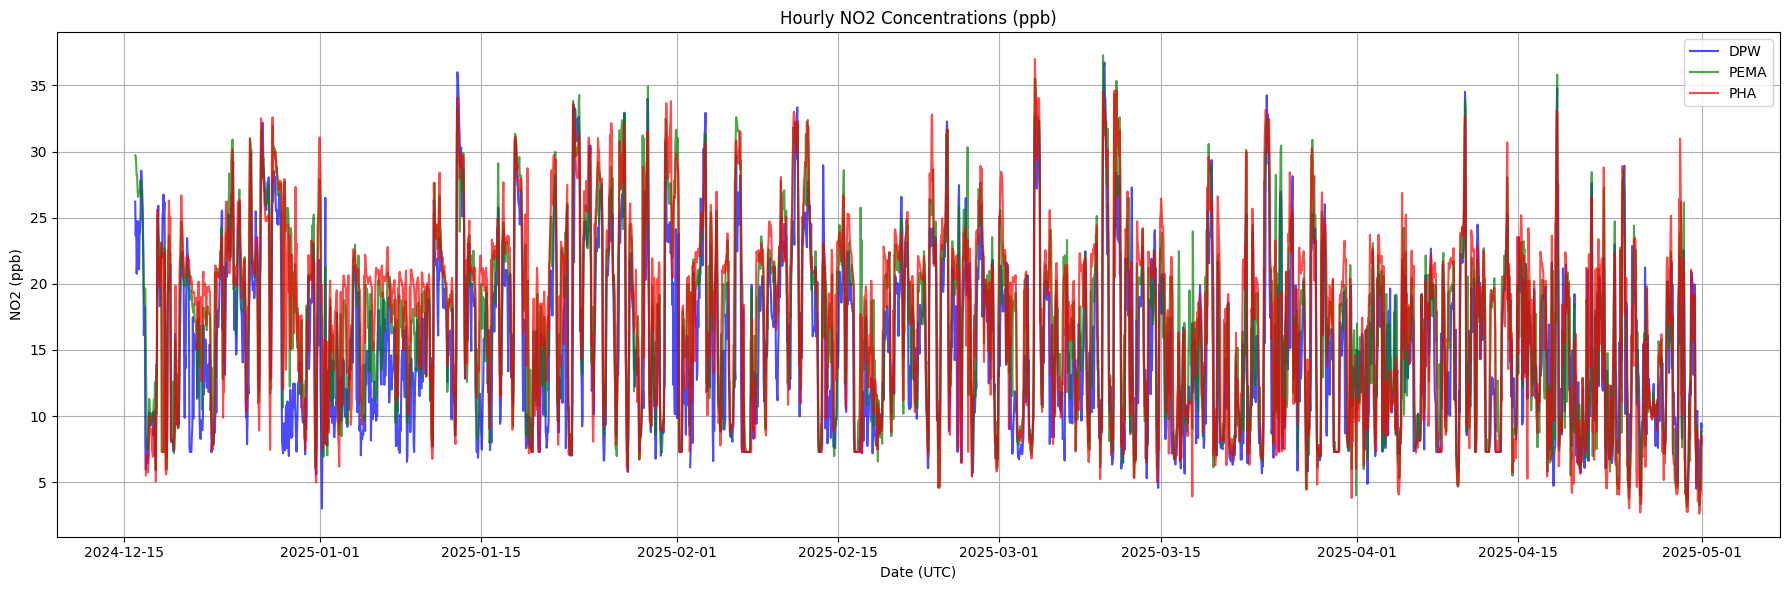

In [16]:
#should probably go back at some point and undo the separation of these. that code was pulled from ozone processing
def prepare_df(df, label):
    df["datetime"] = pd.to_datetime(df["date_utc"] + ' ' + df["time_utc"])
    df = df.set_index("datetime")
    df = df[["no2"]].copy()
    df = df.rename(columns={"no2": label})
    #resample on the hour average
    return df.resample("h").mean() 

#prepare dataframes
dpw_hourly = prepare_df(dpw_df, "DPW")
pema_hourly = prepare_df(pema_df, "PEMA")
pha_hourly = prepare_df(pha_df, "PHA")

merged = pd.concat([dpw_hourly, pema_hourly, pha_hourly], axis=1)

plt.figure(figsize=(18, 6))
plt.plot(merged["DPW"], label="DPW", color="blue", alpha=0.7)
plt.plot(merged["PEMA"], label="PEMA", color="green", alpha=0.7)
plt.plot(merged["PHA"], label="PHA", color="red", alpha=0.7)

plt.title("Hourly NO2 Concentrations (ppb)")
plt.xlabel("Date (UTC)")
plt.ylabel("NO2 (ppb)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

RSD threshold: 3.589534459900515
Length of low_rsd_hours: 324
Total Hours: 3237


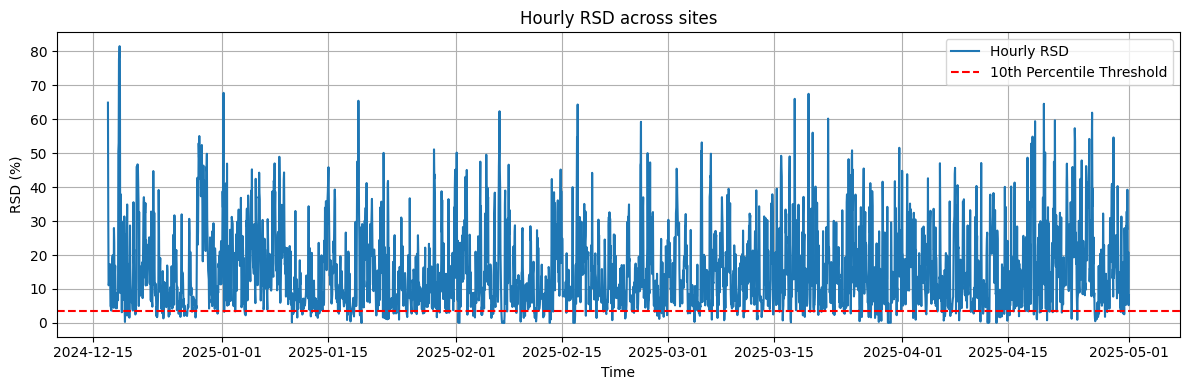

In [17]:
#calculate RSD for each hour
rsd_series = merged.std(axis=1) / merged.mean(axis=1) * 100
merged["RSD"] = rsd_series

#remove missing values
cleaned = merged.dropna(subset=["DPW", "PEMA", "PHA"])

#find tenth percentile threshold
threshold = cleaned["RSD"].quantile(0.10)
print("RSD threshold: " + str(threshold))

#filter for data below this threshold
low_rsd_hours = cleaned[cleaned["RSD"] <= threshold]

print("Length of low_rsd_hours: " + str(len(low_rsd_hours)))
print("Total Hours: " + str(len(cleaned)))

plt.figure(figsize=(12, 4))
plt.plot(cleaned["RSD"], label="Hourly RSD")
plt.axhline(threshold, color="red", linestyle="--", label="10th Percentile Threshold")
plt.title("Hourly RSD across sites")
plt.xlabel("Time")
plt.ylabel("RSD (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


count    3264.000000
mean       15.470427
std        12.015676
min         0.012870
25%         6.403905
50%        11.963690
75%        21.389234
max        81.556295
Name: RSD, dtype: float64


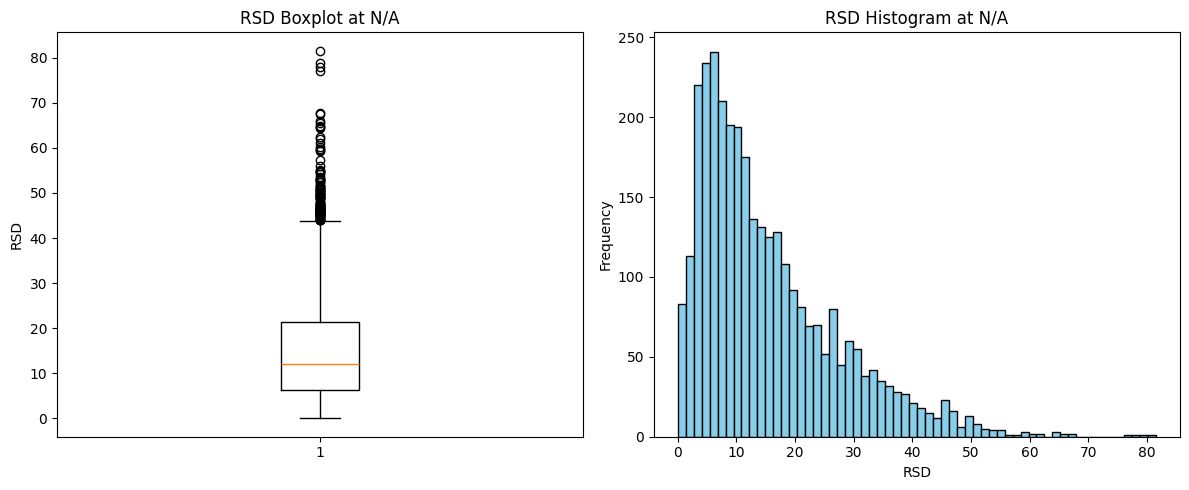

In [18]:
print(merged["RSD"].describe())
plot_box_and_histogram("RSD", merged, "N/A")

In [19]:
print(low_rsd_hours.head())
low_rsd_hours.to_csv("low_rsd.csv")

                          DPW      PEMA       PHA       RSD
datetime                                                   
2024-12-18 18:00:00  6.933700  6.541817  6.883367  3.141839
2024-12-19 04:00:00  8.106350  8.153217  8.134317  0.289979
2024-12-19 09:00:00  7.501317  7.205650  7.485860  2.249658
2024-12-19 16:00:00  9.308633  9.659317  9.549283  1.886754
2024-12-19 18:00:00  9.377050  9.119283  9.363417  1.561891
